<a href="https://colab.research.google.com/github/nishantgta/Bird_Voice_Detection_Using-Artificial-Neural-Network-ANN-/blob/main/Bird_voice_Detection_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os #working with directrories
cwd = os.getcwd() #get cirrent working directory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import natsort
import scipy
import librosa
import librosa.display


In [ ]:
wavDir = "/content/drive/MyDrive/ff1010bird/ff1010bird_wav"
listofwaves=os.listdir(wavDir)
print(len(listofwaves))
sortwavdir=natsort.natsorted(listofwaves,reverse=False)
print(sortwavdir)

2772
['55.wav', '87.wav', '99.wav', '100.wav', '104.wav', '156.wav', '345.wav', '347.wav', '349.wav', '369.wav', '370.wav', '371.wav', '376.wav', '377.wav', '378.wav', '518.wav', '1042.wav', '1043.wav', '1044.wav', '1045.wav', '1046.wav', '1050.wav', '1051.wav', '1052.wav', '1053.wav', '1054.wav', '1055.wav', '1056.wav', '1748.wav', '1931.wav', '1932.wav', '1933.wav', '1934.wav', '1945.wav', '2151.wav', '2155.wav', '2157.wav', '2421.wav', '2432.wav', '2435.wav', '2519.wav', '2520.wav', '2521.wav', '2522.wav', '2523.wav', '2524.wav', '2525.wav', '2526.wav', '2527.wav', '2528.wav', '2529.wav', '2537.wav', '3177.wav', '3180.wav', '3182.wav', '3185.wav', '3187.wav', '3191.wav', '6108.wav', '7313.wav', '7541.wav', '7886.wav', '7991.wav', '7994.wav', '8060.wav', '9235.wav', '9236.wav', '11485.wav', '11505.wav', '11682.wav', '11683.wav', '11684.wav', '11687.wav', '11688.wav', '11690.wav', '11694.wav', '11695.wav', '11697.wav', '11699.wav', '11700.wav', '11702.wav', '11703.wav', '11732.wav', '

In [ ]:
sampleAll = []
for file in sortwavdir:
    filepath = wavDir + '/' + file
    audio,sr = librosa.load(filepath)
    onesecsample = audio[4*sr:8*sr]
    sampleAll.append(onesecsample)

# print(sampleAll)
sampleAll = np.asarray(sampleAll)
print(sampleAll.shape)
print(sampleAll)

(2772, 88200)
[[ 0.07241547  0.08674838  0.11400873 ... -0.02063924 -0.03506486
  -0.05161342]
 [-0.14337638 -0.13978843 -0.13689665 ... -0.12576535 -0.12353903
  -0.11804074]
 [ 0.04468685  0.04418777  0.0402668  ... -0.03366181 -0.04497427
  -0.0514182 ]
 ...
 [-0.04019254  0.022541    0.00417832 ... -0.14487426 -0.12088801
  -0.01694283]
 [-0.00175951  0.00487651 -0.0074116  ...  0.00082132 -0.00064644
  -0.00775737]
 [ 0.01831579  0.01803649  0.01766057 ...  0.0214104   0.02130706
   0.02123051]]


In [ ]:
lableDir = "/content/drive/MyDrive/ff1010bird/ff1010bird_metadata.csv"
df = pd.read_csv(lableDir,header=None,skiprows=1)
#df.sample(10)

data = df.values
''' print(data) '''

data_hash={}

for i in range(len(data)):
  data_hash[data[i][0]]=data[i][1]

labels_2700=[]
for i in range(len(sortwavdir)):
  labels_2700.append(data_hash[int(sortwavdir[i][:-4])])

labels_2700=np.asarray(labels_2700)

#sort the labels
sortedArr = data[data[:,0].argsort()]
# print(sortedArr)

#lets separate the file name and labels

In [ ]:
print(df.shape)

(7690, 2)


In [ ]:
def extract_features_a(input_sample):
  #mfcc, energy, zcr
  all_feature=[]
  for single in input_sample:
    
    #
    #MFCC
    mfcc=librosa.feature.mfcc(y=single,sr=sr,n_mfcc=13,hop_length=len(single)+1)
    #energy
    energy=np.sum(np.square(single)).reshape(-1,1)
    #ZCR
    zcr=librosa.feature.zero_crossing_rate(y=single,hop_length=len(single)+1)

    features_of_a_single_frame=np.concatenate((mfcc,energy,zcr),axis=0)
    all_feature.append(features_of_a_single_frame)

  return all_feature

In [ ]:
def extract_features_b(input_sample):
  #spectral bandwidth, spectral centroid, spectral roll off
  all_feature=[]
  for single in input_sample:
    # single=input_sample[f,:]
    #spectral bandwidth
    spectral_bandwidth=librosa.feature.spectral_bandwidth(y=single,sr=sr,hop_length=len(single)+1)
    #spectral centroid
    sc=librosa.feature.spectral_centroid(y=single,sr=sr,hop_length=len(single)+1)
    #spectral roll off
    spectral_rolloff=librosa.feature.spectral_rolloff(y=single,sr=sr,hop_length=len(single)+1)

    features_of_a_single_frame=np.concatenate((spectral_bandwidth,sc,spectral_rolloff),axis=0)
    all_feature.append(features_of_a_single_frame)

  return all_feature

In [ ]:
print(sampleAll.shape)

(2772, 88200)


In [ ]:
extracted_features=extract_features_b(sampleAll)
extracted_features=np.asarray(extracted_features)
print(extracted_features.shape)
extracted_features = np.reshape(extracted_features,(extracted_features.shape[0],extracted_features.shape[1]))
print(extracted_features.shape)
print("Number of features for each sample: {}".format(extracted_features.shape[1]))

(2772, 3, 1)
(2772, 3)
Number of features for each sample: 3


In [ ]:
print("Number of features for each sample for set B: {}".format(extracted_features.shape[1]))

Number of features for each sample for set B: 3


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(extracted_features,labels_2700,test_size=0.2,random_state=101,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2217, 3)
(555, 3)
(2217,)
(555,)


In [ ]:
#var-function
#function-class
#class-library
#library-framework
#keras is a framework, tensorflow is under keras


In [ ]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

In [ ]:
print(x_train.shape)

(2217, 3)


In [ ]:
#my model is my neural network
my_model = Sequential()
my_model.add(Input(shape=(x_train.shape[1],)))
my_model.add(Dense(12,activation='relu',name='d1'))
my_model.add(Dense(8,activation='relu',name='d2'))
my_model.add(Dense(4,activation='relu',name='d3'))
my_model.add(Dense(1, activation='sigmoid',name='out')) #this is my output layer

In [ ]:
#summarize layer
print(my_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 d1 (Dense)                  (None, 12)                48        
                                                                 
 d2 (Dense)                  (None, 8)                 104       
                                                                 
 d3 (Dense)                  (None, 4)                 36        
                                                                 
 out (Dense)                 (None, 1)                 5         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


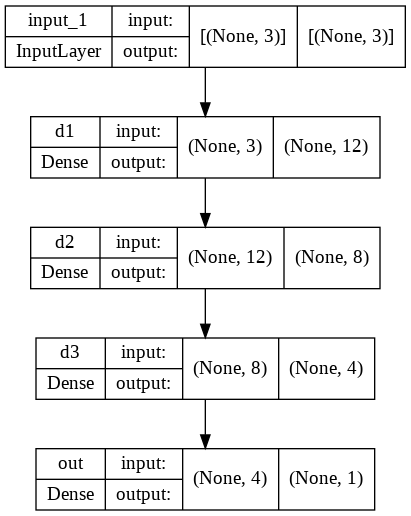

In [ ]:
#plot graph
plot_model(my_model,to_file='model_graph.png',show_shapes=True,show_layer_names=True)

In [ ]:
from tensorflow.keras.optimizers import SGD,RMSprop,Adam,Adadelta,Adagrad,Adamax,Nadam

In [ ]:
my_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','mse','mae'])

In [ ]:
#this fits the keras model to the dataset
my_history=my_model.fit(x_train, y_train, epochs=10, batch_size=4,verbose=1, validation_split=0.1)

Epoch 1/10
499/499 [==============================] - 3s 3ms/step - loss: 34.8857 - accuracy: 0.6376 - mse: 0.3533 - mae: 0.3636 - val_loss: 5.4499 - val_accuracy: 0.7072 - val_mse: 0.2738 - val_mae: 0.2934
Epoch 2/10
499/499 [==============================] - 1s 2ms/step - loss: 4.6530 - accuracy: 0.6426 - mse: 0.3266 - mae: 0.3604 - val_loss: 2.7433 - val_accuracy: 0.7523 - val_mse: 0.2404 - val_mae: 0.2552
Epoch 3/10
499/499 [==============================] - 1s 2ms/step - loss: 2.7705 - accuracy: 0.6496 - mse: 0.3120 - mae: 0.3565 - val_loss: 1.8454 - val_accuracy: 0.5495 - val_mse: 0.3846 - val_mae: 0.4835
Epoch 4/10
499/499 [==============================] - 1s 2ms/step - loss: 1.7117 - accuracy: 0.6446 - mse: 0.2913 - mae: 0.3599 - val_loss: 1.9105 - val_accuracy: 0.7703 - val_mse: 0.2244 - val_mae: 0.2424
Epoch 5/10
499/499 [==============================] - 1s 2ms/step - loss: 1.2783 - accuracy: 0.6566 - mse: 0.2735 - mae: 0.3597 - val_loss: 0.7562 - val_accuracy: 0.7477 - val

In [ ]:
print(len(my_history.history["loss"]))
print(len(my_history.history["val_loss"]))

10
10


In [ ]:
#function to plot the required parameters
def plotting(title,p1,p2,p3,p4,p5,p6):
  plt.subplot(211)
  plt.title(title)
  print(p2,p4)
  plt.plot(my_history.history[p1],label=p2)
  plt.plot(my_history.history[p3],label=p4)
  plt.xlabel(p5)
  plt.ylabel(p6)
  plt.legend()
  plt.show()

train validation


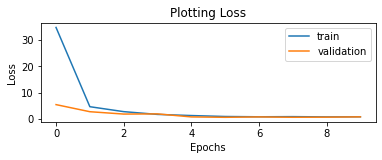

In [ ]:
#Plotting calculated loss
plotting('Plotting Loss','loss','train','val_loss','validation','Epochs','Loss')

train validation


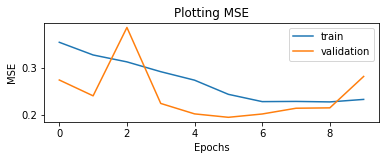

In [ ]:
#Plotting Mean Square Error
plotting('Plotting MSE','mse','train','val_mse','validation','Epochs','MSE')

train validation


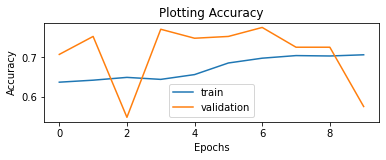

In [ ]:
#Plotting the accuracy
plotting("Plotting Accuracy","accuracy","train","val_accuracy","validation","Epochs","Accuracy")

In [ ]:
import keras

In [ ]:
y_prediction = my_model.predict(x_test) #using our model to make predictions on the testing dataset
calculated_score = my_model.evaluate(x_test,y_test) #to directly evaluate our model


18/18 [==============================] - 0s 2ms/step - loss: 0.8415 - accuracy: 0.5099 - mse: 0.2993 - mae: 0.5262


In [ ]:
print(calculated_score)

[0.8415194749832153, 0.5099099278450012, 0.2993420660495758, 0.5262376666069031]


In [ ]:
# print(y_prediction)

In [ ]:
y_prediction[y_prediction>=0.5]=1
y_prediction[y_prediction<0.5]=0

In [ ]:
print(y_prediction)

[[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.

In [ ]:
for i in y_prediction:
  if i[0]>=0.5:
    i[0]=1
  else:
    i[0]=0

In [ ]:
print(y_prediction)
print(y_test)
c=0
for i in y_prediction:
  if i == 1:
    c+=1
print(c)

[[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
print(confusion_matrix(y_test,y_prediction))
print(accuracy_score(y_test,y_prediction))

[[205 211]
 [ 61  78]]
0.5099099099099099


In [ ]:
#save our model to a single file
my_model.save("lab4_model_1.h5")
print("model saved to disk")

model saved to disk


In [ ]:
#calculate score
score = my_model.evaluate(x_test,y_test,verbose=1)
print(my_model.metrics_names)
print(my_model.metrics_names[1],score[1]*(100))

18/18 [==============================] - 0s 2ms/step - loss: 0.8415 - accuracy: 0.5099 - mse: 0.2993 - mae: 0.5262
['loss', 'accuracy', 'mse', 'mae']
accuracy 50.99099278450012


#MULTILAYER PERCEPTON

In [ ]:
#mulilayer perceptron
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import Input

In [ ]:
print(x_train.shape[1])

3


In [ ]:
visible_input = Input(shape=(x_train.shape[1],),name="Input_layer")
hidden_layer_1 = Dense(150,activation="relu",name="layer_1")(visible_input)
hidden_layer_2 = Dense(80,activation="relu",name="layer_2")(hidden_layer_1)
hidden_layer_3 = Dense(60,activation="relu",name="layer_3")(hidden_layer_2)

output = Dense(1,activation='sigmoid',name='Output_layer')(hidden_layer_3)


In [ ]:
perceptron_model = Model(inputs=visible_input,outputs=output)

In [ ]:
#print summary of all layers
print(perceptron_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 layer_1 (Dense)             (None, 150)               600       
                                                                 
 layer_2 (Dense)             (None, 80)                12080     
                                                                 
 layer_3 (Dense)             (None, 60)                4860      
                                                                 
 Output_layer (Dense)        (None, 1)                 61        
                                                                 
Total params: 17,601
Trainable params: 17,601
Non-trainable params: 0
_________________________________________________________________
None


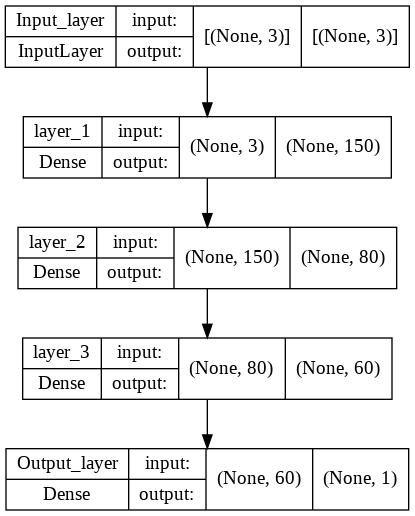

In [ ]:
#show the neural network model
plot_model(perceptron_model,to_file='model_graph.png',show_shapes=True,show_layer_names=True)

SGD,RMSprop,Adam,Adadelta,Adagrad,Adamax,Nadam

In [ ]:
perceptron_model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy','mse','mae'])

In [ ]:
fitted_perceptron_model = perceptron_model.fit(x_train,y_train,epochs=10,batch_size=4,verbose=1,validation_split=0.1)

Epoch 1/10
499/499 [==============================] - 2s 3ms/step - loss: 12.4287 - accuracy: 0.6331 - mse: 0.3466 - mae: 0.3675 - val_loss: 6.2527 - val_accuracy: 0.7748 - val_mse: 0.2313 - val_mae: 0.2476
Epoch 2/10
499/499 [==============================] - 1s 3ms/step - loss: 2.1015 - accuracy: 0.6627 - mse: 0.2839 - mae: 0.3512 - val_loss: 1.8917 - val_accuracy: 0.7748 - val_mse: 0.2243 - val_mae: 0.2266
Epoch 3/10
499/499 [==============================] - 1s 3ms/step - loss: 1.2190 - accuracy: 0.6652 - mse: 0.2621 - mae: 0.3725 - val_loss: 0.5910 - val_accuracy: 0.6847 - val_mse: 0.2005 - val_mae: 0.3995
Epoch 4/10
499/499 [==============================] - 1s 2ms/step - loss: 0.8341 - accuracy: 0.7013 - mse: 0.2263 - mae: 0.3680 - val_loss: 0.5502 - val_accuracy: 0.7748 - val_mse: 0.1814 - val_mae: 0.3949
Epoch 5/10
499/499 [==============================] - 1s 3ms/step - loss: 0.5674 - accuracy: 0.7559 - mse: 0.1871 - mae: 0.3729 - val_loss: 0.5784 - val_accuracy: 0.7748 - val

In [ ]:
def plotting_perceptron(title,p1,p2,p3,p4,p5,p6):
  plt.subplot(211)
  plt.title(title)
  plt.plot(fitted_perceptron_model.history[p1],label=p2)
  plt.plot(fitted_perceptron_model.history[p3],label=p4)
  plt.xlabel(p5)
  plt.ylabel(p6)
  plt.legend()
  plt.show()

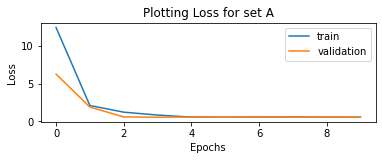

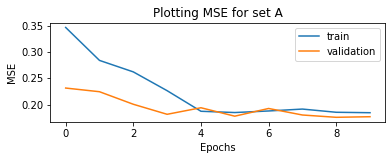

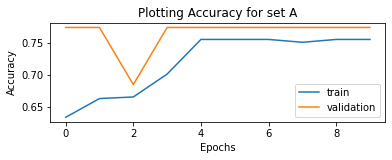

In [ ]:
#Plotting calculated loss
plotting_perceptron('Plotting Loss for set A','loss','train','val_loss','validation','Epochs','Loss')
#Plotting Mean Square Error
plotting_perceptron('Plotting MSE for set A','mse','train','val_mse','validation','Epochs','MSE')
#Plotting the accuracy
plotting_perceptron("Plotting Accuracy for set A","accuracy","train","val_accuracy","validation","Epochs","Accuracy")


In [ ]:
y_pred_perceptron = perceptron_model.predict(x_test)
score_in_perceptron = perceptron_model.evaluate(x_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7495 - mse: 0.1881 - mae: 0.3787


In [ ]:
print(y_pred_perceptron.shape)

(555, 1)


In [ ]:
y_pred_perceptron[y_pred_perceptron>=0.5]=1
y_pred_perceptron[y_pred_perceptron<0.5]=0

print(confusion_matrix(y_test,y_pred_perceptron))
print("Accuracy Score:{}".format(accuracy_score(y_test,y_pred_perceptron)))

[[416   0]
 [139   0]]
Accuracy Score:0.7495495495495496


In [ ]:
ones=0
for i in range(len(y_pred_perceptron)):
  if y_pred_perceptron[i]==1:
    ones+=1

print("Number of ones={}".format(ones))

Number of ones=0


In [ ]:
#print(y_pred_perceptron)

In [ ]:
#calculating score in perceptron model
score_perceptron = perceptron_model.evaluate(x_test,y_test,verbose=1)
print(perceptron_model.metrics_names[1],score_perceptron[1]*100)

18/18 [==============================] - 0s 3ms/step - loss: 0.5643 - accuracy: 0.7495 - mse: 0.1881 - mae: 0.3787
accuracy 74.95495676994324
